In [1]:
import pandas as pd
import numpy as np
from khaiii import KhaiiiApi
import gensim
import pyLDAvis.gensim
import numpy as np
import logging
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import time
from pprint import pprint

In [2]:
data = pd.read_csv("./modi_data/full_data.csv") ############
#data = data.drop(['Unnamed: 0'], axis=1)
data.head()

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,title,date,num,full_data
0,28920,자폐아이 치료한다고 야외에서 찬물로 씻기는 **×이 학대인정 해라,2021-02-12,"2,348",자폐아이 치료한다고 야외에서 찬물로 씻기는 **×이 학대인정 해라 안녕하세요 지금 ...
1,28919,교원임용 2차시험의 공정성과 투명성,2021-02-12,421,교원임용 2차시험의 공정성과 투명성 저는 2021학년도 중등임용시험에 응시한 수험생...
2,28918,교사 임용시험. 공정한 시험 실시 및 평가를 요구합니다.,2021-02-12,"4,092",교사 임용시험. 공정한 시험 실시 및 평가를 요구합니다. 안녕하세요. 2021 중등...
3,28917,어린이집 및 유치원 실시간 cctv 공개 의무 법안 요구,2021-02-12,963,어린이집 및 유치원 실시간 cctv 공개 의무 법안 요구 울산 인천 등등 수없이 많...
4,28916,2021년 교육. 2020년과 달라야합니다.,2021-02-09,446,2021년 교육. 2020년과 달라야합니다. 2020년 모두가 힘든 시기였습니다. ...


dfWordList = pd.read_excel("./khaiii_word_cor.xlsx")
dfWordList2 = pd.read_excel("./khaiii_word_cor_etc.xlsx")
#print(dfWordList2)

dfWordDel = dfWordList[dfWordList["수정"] == "삭제"]
dfWordMod = dfWordList[dfWordList["수정"] != "삭제"]
dfWordDiv = dfWordList2
#print(dfWordMod)

seriesDelete = dfWordDel["기존"]
stopword = []
for word in seriesDelete.values:
    stopword.append(word)
#print(stopword)

seriesModify = dfWordMod["기존"]
modiword = []
for word in seriesModify.values:
    modiword.append(word)
#print(len(modiword))

seriesModify2 = dfWordMod["수정"]
modiword2 = []
for word in seriesModify2.values:
    modiword2.append(word)
#print(len(modiword2))

seriesDivide = dfWordDiv["기존"]
divword = []
for word in seriesDivide.values:
    divword.append(word)
#print(divword)
#print(len(divword))

seriesDivide2 = dfWordDiv["수정"]
divword2 = []
for words in seriesDivide2.values:
    divword2.append(words.split(', '))
#print(divword2)
#print(len(divword2))

In [3]:
api = KhaiiiApi()
def khaiiiTokenizer(raw, pos=['NNG', 'NNP', 'NNB', 'NP', 'NR', 'SL']):#, stopword=stopword,): # 일반명사 고유명사 의존명사 대명사 수사 외국어
    list = []
    skip = 0

    for word in api.analyze(raw): #raw data
        #print(word)
        
        for i, morph in enumerate(word.morphs):
            #print(morph.lex)

            if len(morph.lex) > 1 and morph.tag in pos: #and morph.lex not in stopword: 
                if morph.tag == 'SL':
                    morph.lex = morph.lex.lower()
                # if morph.lex in divword:
                #     morph.lex = divword2[divword.index(morph.lex)]
                #     list.extend(morph.lex)
                # elif morph.lex in modiword:
                #     morph.lex = modiword2[modiword.index(morph.lex)]
                #     list.append(morph.lex)
                # else: 
                list.append(morph.lex)
                
    return list

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
tokenized = data['full_data'].apply(lambda row: khaiiiTokenizer(row))
#print(tokenized)
#tokenized.to_excel("./final_data/0327token_full.xlsx") ##############
print("========= tokenization completed =========")

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
========= tokenization completed =========


In [5]:
#lda
id2word = gensim.corpora.Dictionary(tokenized)

wordlist = []
for i in range(len(id2word)):
    #print(id2word[i])
    wordlist.append(id2word[i])
#print(wordlist)
seriesWordlist = pd.Series(wordlist)
#seriesWordlist.to_excel("./final_data/1228wordlist_full.xls") #################

corpus=[id2word.doc2bow(text) for text in tokenized]
#print("id2word for each document : ", corpus)
print("# words in total : ", len(id2word))
print("# documents : ", len(corpus))

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
# words in total :  91609
# documents :  28482


In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    perplexity_values = []
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=num_topics,
                                                random_state=100,
                                                update_every=1,
                                                iterations=1000,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                eta='auto',
                                                per_word_topics=True)
        model_list.append(model)
        perplexitymodel = model.log_perplexity(corpus)
        perplexity_values.append(perplexitymodel)
        coherencemodel = CoherenceModel(model=model,
                                        texts=texts,
                                        dictionary=dictionary,
                                        coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, perplexity_values, coherence_values

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
start = time.time()
model_list, perplexity_values, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=tokenized,
                                                        start=2,
                                                        limit=16, #####
                                                        step=1)
print("time : ", ( time.time() - start )/60, "min")

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
time :  390.9131131450335 min


/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


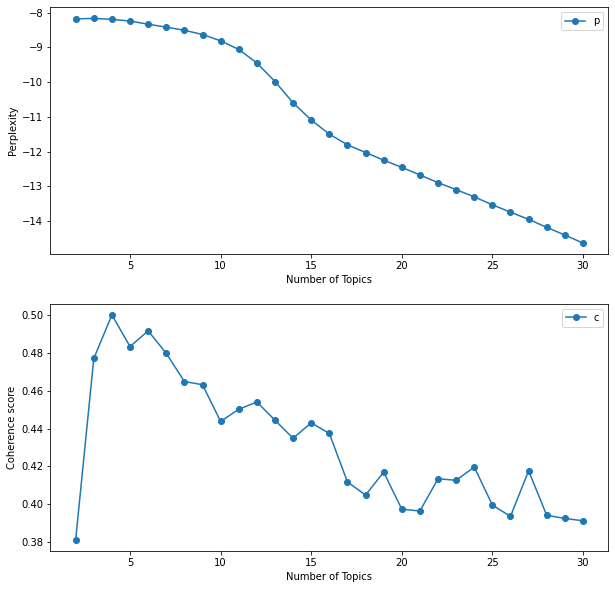

In [8]:
limit=16 ######
start=2
step=1
x = range(start, limit, step)


fig, ax = plt.subplots(2,1, figsize=(10, 10))

ax[0].plot(x, perplexity_values, marker='o')
ax[0].set_xlabel("Number of Topics")
ax[0].set_ylabel("Perplexity")
ax[0].legend(("perplexity"), loc='best')

ax[1].plot(x, coherence_values, marker='o')
ax[1].set_xlabel("Number of Topics")
ax[1].set_ylabel("Coherence score")
ax[1].legend(("coherence_values"), loc='best')
plt.show()

In [9]:
for m, pv in zip(x, perplexity_values):
  print("Num Topics =", m, " has Perplexity Value of", round(pv, 4))

for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Perplexity Value of -8.1766
Num Topics = 3  has Perplexity Value of -8.1644
Num Topics = 4  has Perplexity Value of -8.1898
Num Topics = 5  has Perplexity Value of -8.2403
Num Topics = 6  has Perplexity Value of -8.3296
Num Topics = 7  has Perplexity Value of -8.4159
Num Topics = 8  has Perplexity Value of -8.5047
Num Topics = 9  has Perplexity Value of -8.6268
Num Topics = 10  has Perplexity Value of -8.8089
Num Topics = 11  has Perplexity Value of -9.057
Num Topics = 12  has Perplexity Value of -9.4446
Num Topics = 13  has Perplexity Value of -9.9795
Num Topics = 14  has Perplexity Value of -10.5925
Num Topics = 15  has Perplexity Value of -11.087
Num Topics = 16  has Perplexity Value of -11.4936
Num Topics = 17  has Perplexity Value of -11.8005
Num Topics = 18  has Perplexity Value of -12.0221
Num Topics = 19  has Perplexity Value of -12.2421
Num Topics = 20  has Perplexity Value of -12.4477
Num Topics = 21  has Perplexity Value of -12.6681
Num Topics = 22  has P

In [10]:
a = int(input("set the number of topics "))
optimal_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=a,
                                                random_state=100,
                                                update_every=1,
                                                iterations=1000,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                eta='auto',
                                                per_word_topics=True)
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[(0,
  '0.106*"학교" + 0.062*"청소년법" + 0.035*"선생" + 0.022*"폭력" + 0.015*"저희" + '
  '0.012*"담임" + 0.011*"친구" + 0.010*"학생" + 0.010*"교육청" + 0.010*"피해자" + '
  '0.010*"가해자" + 0.008*"교실" + 0.006*"청와대" + 0.006*"존경" + 0.005*"발령" + '
  '0.005*"피해학생" + 0.005*"여학생" + 0.005*"신고" + 0.005*"인권" + 0.005*"상담" + '
  '0.005*"교감" + 0.005*"교장" + 0.005*"학년" + 0.005*"석면" + 0.005*"학폭" + '
  '0.005*"중학교" + 0.005*"피해" + 0.004*"초등학교" + 0.004*"학부모" + 0.004*"배정"'),
 (1,
  '0.111*"청소년" + 0.051*"보호법" + 0.036*"처벌" + 0.036*"소년법" + 0.029*"사건" + '
  '0.023*"범죄" + 0.020*"보호" + 0.019*"폭행" + 0.016*"피해자" + 0.015*"가해자" + '
  '0.014*"생각" + 0.012*"부산" + 0.011*"여중" 

In [11]:
title = "crawling_lda"
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
pyLDAvis.save_html(vis, title+".html")

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# topic proportion
# num of optimal topics = 6

proportion = []
for i, row_list in enumerate(optimal_model[corpus]):
    #print("document number : ", i)
    row = row_list[0]
    #print(row)
    proportion.append(row)
print(pd.DataFrame(proportion))

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
                      0                 1                  2  \
0       (0, 0.07875751)   (1, 0.11431073)   (3, 0.038075775)   
1      (0, 0.019093134)   (2, 0.76486355)  (3, 0.0129446685)   
2       (0, 0.05783724)    (2, 0.6565755)     (3, 0.0458181)   
3      (0, 0.027211824)    (1, 0.1396739)    (4, 0.73408014)   
4      (0, 0.035921272)  (2, 0.047459092)    (3, 0.55096155)   
...                 ...               ...                ...   
28477   (2, 0.30574444)   (3, 0.25799736)   (4, 0.111190714)   
28478   (0, 0.03534511)   (2, 0.58484614)   (3, 0.033390753)   
28479   (3, 0.24686252)   (4, 0.48288944)     (5, 0

In [13]:
proportion = []
for i, row_list in enumerate(optimal_model[corpus]):
    #print("document number : ", i)
    row = row_list[0]
    #print(row)
    inner_proportion = ["-", "-", "-", "-", "-", "-"] # numtopics 6
    for j, (topic_num, prop) in enumerate(row):
        for k in range(6): # numtopics 6
            if topic_num == k:
                inner_proportion[k] = prop
    proportion.append(inner_proportion)
    #print(inner_proportion)
#print(proportion)

#topic_proportions = pd.DataFrame(data["title"])

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
topic_proportions = pd.concat([data["title"], pd.DataFrame(proportion)], axis=1)
topic_proportions.columns = ["Title", "T0", "T1", "T2", "T3", "T4", "T5"] #num topics = 6
print(topic_proportions)
topic_proportions.to_excel("./final_data/0328_topic_proportions_total.xlsx")

/Users/uni613/Library/Python/3.8/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
                                           Title        T0        T1  \
0           자폐아이 치료한다고 야외에서 찬물로 씻기는 **×이 학대인정 해라  0.078759  0.114310   
1                            교원임용 2차시험의 공정성과 투명성  0.019102         -   
2                교사 임용시험. 공정한 시험 실시 및 평가를 요구합니다.  0.057837         -   
3                어린이집 및 유치원 실시간 cctv 공개 의무 법안 요구  0.027214  0.139672   
4                       2021년 교육. 2020년과 달라야합니다.  0.035924         -   
...                                          ...       ...       ...   
28477                        기간제교사의 정규직화를 반대합니다.         -         -   
28478                      초등학교 교사 임용 시험 관련 해결방안  0